In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('classification_train.csv')
train = df.to_numpy()
x_train = np.delete(train, [0, 1], axis = 1)
y_train = train[:, 1]
y_train = np.ravel(y_train)
x_train = np.reshape(x_train, (30000, 28, 28))
df_test = pd.read_csv('classification_test.csv')
test = df_test.to_numpy()
x_test = np.delete(test, 0, axis =1)
y_test = np.zeros(x_test.shape[0])
y_test = y_test.reshape(x_test.shape[0], 1)

In [72]:
x_traintrain = np.delete(x_train, range(15000, 20000), axis  = 0)
nn = x_traintrain.shape[0]
x_traintest = x_train[15000:20000 , :]
y_traintrain = np.delete(y_train, range(15000,20000), axis = 0)
y_traintest = y_train[15000:20000]

[7, 5, 4, 8, 0, 5, 9, 5, 8]


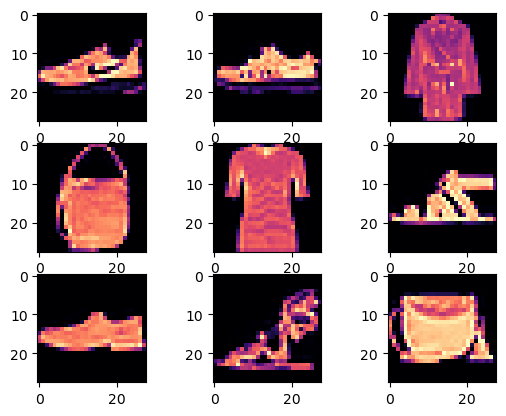

In [73]:
labels = []
for i in range(1, 10):
    index = np.random.choice(29999)
    labels.append(y_train[index])
    plt.subplot(3,3,i, alpha = 0)
    plt.imshow(x_train[index], cmap='magma')
print(labels)

In [74]:
x_train = x_train.reshape(30000,784)
x_traintrain = x_traintrain/255
x_traintest = x_traintest/255

In [102]:
x_traintrain = np.delete(x_train, range(10000, 20000), axis  = 0)
nn = x_traintrain.shape[0]
x_traintest = x_train[10000:20000 , :]
y_traintrain = np.delete(y_train, range(10000,20000), axis = 0)
y_traintest = y_train[10000:20000]
y_meanmean = np.sum(y_traintest)/10000

In [103]:
m, n = x_traintrain.shape

In [134]:
w = np.zeros(n)
w = w.reshape(n,1)
b = 0
y_hat = np.zeros(m)
alpha = 1.0e-6
num_iters = 10000
a_1 = np.zeros(m)
costs = []

In [135]:
def sigmoid(z):
    f = 1/(1 + np.exp(-z))
    return f

In [136]:
def BinaryCrossEntropy(y_hat, y):
    ep = 1.0e-2
    return np.divide(np.sum(np.matmul(y.T, np.log(y_hat + ep)) + np.multiply((1-y).T,  np.log(1-y_hat + ep))), -m)

In [137]:
def forward_prop(x, y, w, b):
    a = sigmoid(np.dot(x, w) + b)
    cost = BinaryCrossEntropy(a, y)
    return cost

In [138]:
def backward_prop(x, y_hat, y):
    y_hat = np.ravel(y_hat)
    a_1 = y_hat - y
    a_1 = a_1.reshape(m, 1)
    dj_dw = (np.dot(x.T, (a_1)))/m
    dj_db = np.sum(y_hat - y)/m
    dj_dw = np.ravel(dj_dw)
    return dj_dw, dj_db

In [139]:
q, w = backward_prop(x_traintrain, sigmoid(np.dot(x_traintrain, w) + b), y_traintrain)
print(a_1.shape)

(20000,)


In [140]:
def optimize(x, y, w, b, num_iters, alpha):
    p_history = []
    for i in range(num_iters):
        a = sigmoid(np.dot(x, w) + b)
        cost = BinaryCrossEntropy(a, y)
        dj_dw, dj_db = backward_prop(x, a, y)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        if i % 100 == 0:
            costs.append(cost)
            p_history.append([w,b])
            print("Cost after %i iteration: %f" %(i, cost))
    return w, b, p_history, costs       

In [141]:
def predict(x, w, b):
    a = sigmoid(np.dot(x, w) + b)
    y_pred = (a > 0.5).astype(int)
    return y_pred     

In [142]:
def model(x_train, y_train, x_test, y_test, num_iters, alpha):
    w = np.zeros(n)
    b = 0
    w_fi, b_fi, p_fi, J_fi  = optimize(x_train, y_train, w, b, num_iters, alpha)
    y_prediction_train = predict(x_train, w_fi, b_fi)
    y_prediction_test = predict(x_test, w_fi, b_fi)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return J_fi, y_prediction_train, w_fi, b_fi
    

In [143]:
Num_of_classes = np.max(y_train)+1
J_final = []
p_final = []
b_final = []
for i in range(Num_of_classes):
    print("Digit : " + str(i))
    y_traintrain_copy = np.copy(y_traintrain)
    y_traintest_copy = np.copy(y_traintest)
    y_traintrain_copy = (y_traintrain_copy == i).astype(int)
    y_traintest_copy = (y_traintest_copy == i).astype(int)
    J_fina, h, w_fina, b_fina  = model(x_traintrain, y_traintrain_copy, x_traintest, y_traintest_copy, num_iters, alpha)
    J_final.append(J_fina)
    b_final.append(b_fina)

Digit : 0
Cost after 0 iteration: 1354.701536
Cost after 100 iteration: 1401.447571
Cost after 200 iteration: 1273.786216
Cost after 300 iteration: 1224.972289
Cost after 400 iteration: 1196.066801
Cost after 500 iteration: 1175.692689
Cost after 600 iteration: 1160.016589
Cost after 700 iteration: 1147.305817
Cost after 800 iteration: 1136.628569
Cost after 900 iteration: 1127.426707
Cost after 1000 iteration: 1119.341253
Cost after 1100 iteration: 1112.129271
Cost after 1200 iteration: 1105.619773
Cost after 1300 iteration: 1099.688445
Cost after 1400 iteration: 1094.242344
Cost after 1500 iteration: 1089.210243
Cost after 1600 iteration: 1084.536323
Cost after 1700 iteration: 1080.175960
Cost after 1800 iteration: 1076.092833
Cost after 1900 iteration: 1072.256897
Cost after 2000 iteration: 1068.642950
Cost after 2100 iteration: 1065.229575
Cost after 2200 iteration: 1061.998377
Cost after 2300 iteration: 1058.933401
Cost after 2400 iteration: 1056.020689
Cost after 2500 iteration: 

KeyboardInterrupt: 

In [ ]:
print(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per huDigit : 0
Cost after 0 iteration: 1354.701536

/tmp/ipykernel_5969/1728406497.py:2: RuntimeWarning: overflow encountered in exp
  f = 1/(1 + np.exp(-z))
ndreds)')
plt.title("Learning rate =" + str(alpha))
plt.show()

Digit : 0
Cost after 0 iteration: 1354.701536
Cost after 100 iteration: 1401.447571
Cost after 200 iteration: 1273.786216
Cost after 300 iteration: 1224.972289
Cost after 400 iteration: 1196.066801
Cost after 500 iteration: 1175.692689
Cost after 600 iteration: 1160.016589
Cost after 700 iteration: 1147.305817
Cost after 800 iteration: 1136.628569
Cost after 900 iteration: 1127.426707
Cost after 1000 iteration: 1119.341253
Cost after 1100 iteration: 1112.129271
Cost after 1200 iteration: 1105.619773
Cost after 1300 iteration: 1099.688445
Cost after 1400 iteration: 1094.242344
Cost after 1500 iteration: 1089.210243
Cost after 1600 iteration: 1084.536323
Cost after 1700 iteration: 1080.175960
Cost after 1800 iteration: 1076.092833
Cost after 1900 iteration: 1072.256897
Cost after 2000 iteration: 1068.642950
Cost after 2100 iteration: 1065.229575
Cost after 2200 iteration: 1061.998377
Cost after 2300 iteration: 1058.933401
Cost after 2400 iteration: 1056.020689
Cost after 2500 iteration: 1053.247939
Cost after 2600 iteration: 1050.604241
Cost after 2700 iteration: 1048.079861
Cost after 2800 iteration: 1045.666069
Cost after 2900 iteration: 1043.355006
Cost after 3000 iteration: 1041.139563
Cost after 3100 iteration: 1039.013290
Cost after 3200 iteration: 1036.970314
Cost after 3300 iteration: 1035.005274
Cost after 3400 iteration: 1033.113262
Cost after 3500 iteration: 1031.289775
Cost after 3600 iteration: 1029.530671
Cost after 3700 iteration: 1027.832134
Cost after 3800 iteration: 1026.190642
Cost after 3900 iteration: 1024.602937
Cost after 4000 iteration: 1023.066001
Cost after 4100 iteration: 1021.577035
Cost after 4200 iteration: 1020.133438
Cost after 4300 iteration: 1018.732792
Cost after 4400 iteration: 1017.372843
Cost after 4500 iteration: 1016.051491
Cost after 4600 iteration: 1014.766776
Cost after 4700 iteration: 1013.516865
Cost after 4800 iteration: 1012.300043
Cost after 4900 iteration: 1011.114707
Cost after 5000 iteration: 1009.959351
Cost after 5100 iteration: 1008.832566
Cost after 5200 iteration: 1007.733026
Cost after 5300 iteration: 1006.659487
Cost after 5400 iteration: 1005.610780
Cost after 5500 iteration: 1004.585802
Cost after 5600 iteration: 1003.583518
Cost after 5700 iteration: 1002.602949
Cost after 5800 iteration: 1001.643175
Cost after 5900 iteration: 1000.703326
Cost after 6000 iteration: 999.782580
Cost after 6100 iteration: 998.880162
Cost after 6200 iteration: 997.995338
Cost after 6300 iteration: 997.127414
Cost after 6400 iteration: 996.275732
Cost after 6500 iteration: 995.439672
Cost after 6600 iteration: 994.618642
Cost after 6700 iteration: 993.812083
Cost after 6800 iteration: 993.019466
Cost after 6900 iteration: 992.240286
Cost after 7000 iteration: 991.474064
Cost after 7100 iteration: 990.720346
Cost after 7200 iteration: 989.978700
Cost after 7300 iteration: 989.248714
Cost after 7400 iteration: 988.529996
Cost after 7500 iteration: 987.822175
Cost after 7600 iteration: 987.124894
Cost after 7700 iteration: 986.437815
Cost after 7800 iteration: 985.760615
Cost after 7900 iteration: 985.092985
Cost after 8000 iteration: 984.434633
Cost after 8100 iteration: 983.785276
Cost after 8200 iteration: 983.144647
Cost after 8300 iteration: 982.512488
Cost after 8400 iteration: 981.888555
Cost after 8500 iteration: 981.272611
Cost after 8600 iteration: 980.664434
Cost after 8700 iteration: 980.063806
Cost after 8800 iteration: 979.470522
Cost after 8900 iteration: 978.884384
Cost after 9000 iteration: 978.305202
Cost after 9100 iteration: 977.732795
Cost after 9200 iteration: 977.166988
Cost after 9300 iteration: 976.607612
Cost after 9400 iteration: 976.054507
Cost after 9500 iteration: 975.507518
Cost after 9600 iteration: 974.966497
Cost after 9700 iteration: 974.431299
Cost after 9800 iteration: 973.901787
Cost after 9900 iteration: 973.377829
train accuracy: 96.18 %
test accuracy: 95.93 %